# Price Prediction using Regression

This is a tickets pricing monitoring system. It scrapes tickets pricing data periodically and stores it in a database. Ticket pricing changes based on demand and time, and there can be significant difference in price. We are creating this product mainly with ourselves in mind. Users can set up alarms using an email, choosing an origin and destination (cities), time (date and hour range picker) choosing a price reduction over mean price, etc.

**Following is the description for columns in the dataset**<br>
- insert_date: date and time when the price was collected and written in the database<br>
- origin: origin city <br>
- destination: destination city <br>
- start_date: train departure time<br>
- end_date: train arrival time<br>
- train_type: train service name<br>
- price: price<br>
- train_class: ticket class, tourist, business, etc.<br>
- fare: ticket fare, round trip, etc <br>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

#### **Task 1: Import Dataset and create a copy of that dataset**

In [3]:
#write code here
data = pd.read_csv("data1.csv")
df = data.copy() 

#### **Task 2: Display first five rows** 

In [4]:
#write code here
df.head()

Unnamed: 0          insert_date      origin destination  \
0         702  2019-04-19 05:37:35  PONFERRADA      MADRID   
1         703  2019-04-19 05:37:35  PONFERRADA      MADRID   
2         704  2019-04-19 05:37:35  PONFERRADA      MADRID   
3         705  2019-04-19 05:37:35  PONFERRADA      MADRID   
4         706  2019-04-19 05:37:35  PONFERRADA      MADRID   

            start_date             end_date train_type  price  \
0  2019-06-02 15:00:00  2019-06-02 19:42:00     MD-AVE  59.50   
1  2019-06-02 17:15:00  2019-06-02 23:03:00     MD-AVE  34.65   
2  2019-06-02 17:15:00  2019-06-02 23:10:00      MD-LD  39.95   
3  2019-06-02 17:15:00  2019-06-02 22:14:00     MD-AVE  40.60   
4  2019-06-02 18:55:00  2019-06-02 23:03:00      ALVIA  27.90   

          train_class      fare  
0  Turista con enlace  Flexible  
1  Turista con enlace   Promo +  
2  Turista con enlace   Promo +  
3  Turista con enlace   Promo +  
4             Turista     Promo

#### **Task 3: Drop 'unnamed: 0' column**

In [5]:
#write code here
df.drop(['Unnamed: 0'], axis =1 ,inplace=True)

#### **Task 4: Check the number of rows and columns**

In [6]:
#write code here
print(df.count())
#write code here
print(df.shape)


insert_date    215909
origin         215909
destination    215909
start_date     215909
end_date       215909
train_type     215909
price          202321
train_class    215266
fare           215266
dtype: int64
(215909, 9)


#### **Task 5: Check data types of all columns**

In [7]:
#write code here
df.dtypes

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

#### **Task 6: Check summary statistics**

In [8]:
#write code here
df.describe()

price
count  202321.000000
mean       56.723877
std        25.531787
min        16.600000
25%        28.350000
50%        53.400000
75%        76.300000
max       206.800000

#### **Task 7: Check summary statistics of all columns, including object dataypes**

In [9]:
newdf = data.copy()
newdf.head()

Unnamed: 0          insert_date      origin destination  \
0         702  2019-04-19 05:37:35  PONFERRADA      MADRID   
1         703  2019-04-19 05:37:35  PONFERRADA      MADRID   
2         704  2019-04-19 05:37:35  PONFERRADA      MADRID   
3         705  2019-04-19 05:37:35  PONFERRADA      MADRID   
4         706  2019-04-19 05:37:35  PONFERRADA      MADRID   

            start_date             end_date train_type  price  \
0  2019-06-02 15:00:00  2019-06-02 19:42:00     MD-AVE  59.50   
1  2019-06-02 17:15:00  2019-06-02 23:03:00     MD-AVE  34.65   
2  2019-06-02 17:15:00  2019-06-02 23:10:00      MD-LD  39.95   
3  2019-06-02 17:15:00  2019-06-02 22:14:00     MD-AVE  40.60   
4  2019-06-02 18:55:00  2019-06-02 23:03:00      ALVIA  27.90   

          train_class      fare  
0  Turista con enlace  Flexible  
1  Turista con enlace   Promo +  
2  Turista con enlace   Promo +  
3  Turista con enlace   Promo +  
4             Turista     Promo

In [10]:
newdf.drop(['Unnamed: 0','price'], axis =1 ,inplace=True)

In [11]:
type(newdf)
newdf.count()

insert_date    215909
origin         215909
destination    215909
start_date     215909
end_date       215909
train_type     215909
train_class    215266
fare           215266
dtype: int64

In [12]:
newdf.describe()

insert_date  origin destination           start_date  \
count                215909  215909      215909               215909   
unique                30543       5           5                 2231   
top     2019-05-09 15:02:02  MADRID      MADRID  2019-06-02 17:30:00   
freq                     90  110440      105469                 2089   

                   end_date train_type train_class    fare  
count                215909     215909      215266  215266  
unique                 2870         16           5       5  
top     2019-06-02 23:03:00        AVE     Turista   Promo  
freq                   1278     126577      164016  132065

**Question: Explain the summary statistics for the above data set**

**Answer:**
* The above statistics is very helpful specially for EDA and help us for understanding the  dataset
* count shows the over all each row data , and unique shows the unique rows in each colomn , and the freq shows the most occured  values in each colomn 
* The above summary statistics shows the unique values and most occured values and top destination, origin and count the over all data in the data set.
 

#### **Task 8: Check null values in dataset**

In [13]:
#write code here
df.isnull().sum()

insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

#### **Task 9: Fill the Null values in the 'price' column.**<br>
*Hint: Take mean*

In [14]:
#write code here
df['price'].mean()
df['price'].fillna(56.7, inplace=True)

In [15]:
df.isnull().sum()

insert_date      0
origin           0
destination      0
start_date       0
end_date         0
train_type       0
price            0
train_class    643
fare           643
dtype: int64

#### **Task 10: Drop the rows containing Null values in the attributes train_class and fare**

In [16]:
#write code here
df.drop(['train_class','fare'], axis =1 ,inplace=True)

#### **Task 11: Drop 'insert_date'**

In [17]:
#write code here
df.drop(['insert_date'], axis =1 ,inplace=True)

**Check null values again in dataset**

In [18]:
#write code here
df.isnull().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
dtype: int64

#### **Task 12: Plot number of people boarding from different stations**


In [19]:
#write code here
# print(df['origin'].count()) 
# df.groupby('origin')['train_type'].value_counts()
df_difrnt_statn = df.groupby('origin')['destination'].value_counts()
df_difrnt_statn
# print(df['origin'].unique())

origin      destination
BARCELONA   MADRID         39479
MADRID      BARCELONA      41146
            VALENCIA       39447
            SEVILLA        26999
            PONFERRADA      2848
PONFERRADA  MADRID          2581
SEVILLA     MADRID         27112
VALENCIA    MADRID         36297
Name: destination, dtype: int64

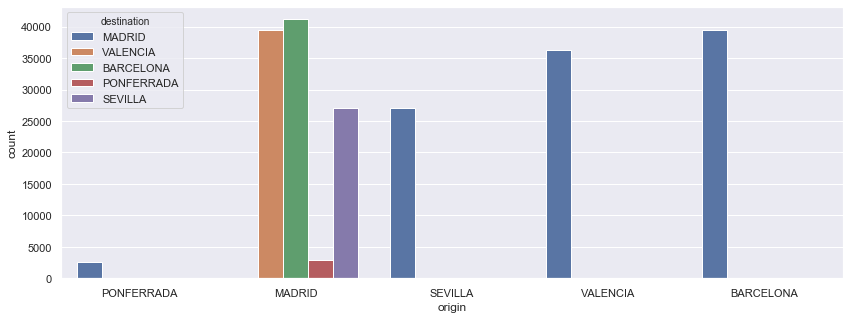

In [20]:
plt.figure(figsize=(14,5));
sns.countplot(x='origin', hue='destination', data=df);

**Question: What insights do you get from the above plot?**

**Answer:**
* peoples were boarding from these different stations 'PONFERRADA', 'MADRID', 'SEVILLA', 'VALENCIA', 'BARCELONA'
* List of people boarding from theses different origin.


      origin      destination
  
  
    BARCELONA   MADRID         39479
    MADRID      BARCELONA      41146
                VALENCIA       39447
                SEVILLA        26999
                PONFERRADA      2848
    PONFERRADA  MADRID          2581
    SEVILLA     MADRID         27112
    VALENCIA    MADRID         36297

#### **Task 13: Plot number of people for the destination stations**


In [21]:
#write code here
# df['destination'].value_count()
#print(df['destination'].unique())
df_difrnt_destn = df.groupby('destination')['destination'].value_counts()
df_difrnt_destn

destination  destination
BARCELONA    BARCELONA       41146
MADRID       MADRID         105469
PONFERRADA   PONFERRADA       2848
SEVILLA      SEVILLA         26999
VALENCIA     VALENCIA        39447
Name: destination, dtype: int64

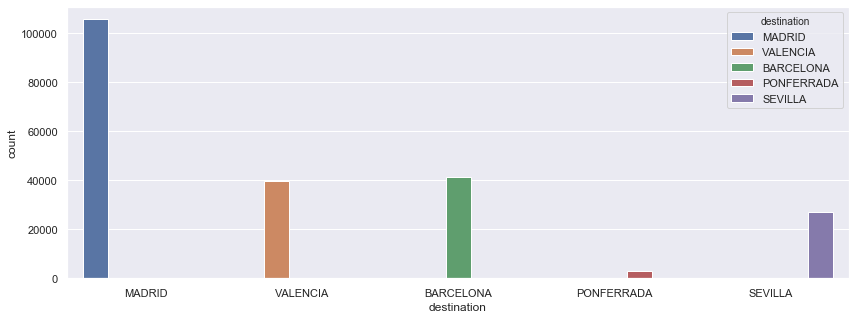

In [22]:
plt.figure(figsize=(14,5));
sns.countplot(x='destination', hue='destination', data=df);

**Question: What insights do you get from the above graph?**

**Answer:**
* peoples landed at these different stations 'MADRID' 'VALENCIA' 'BARCELONA' 'PONFERRADA' 'SEVILLA' majority of the destination was madrid then barcelona then valencia then sevilla and the last least amount were landed in ponferrada

#### **Task 14: Plot different types of train that runs in Spain**


In [23]:
#write code here
print(df['train_type'].count())
# print(df['train_type'].unique())
# df_trn_type = df.groupby(['origin', 'train_type'])['destination'].count()
# print(df_trn_type)
df_trn_type2 = df.groupby(['train_type', 'origin'])['destination'].count()
print(df_trn_type2)

215909
train_type  origin    
ALVIA       MADRID         3852
            PONFERRADA      411
            SEVILLA        3293
AV City     MADRID         2766
            SEVILLA        2712
AVE         BARCELONA     33912
            MADRID        65384
            SEVILLA       19062
            VALENCIA       8219
AVE-LD      BARCELONA        22
            MADRID         1056
            SEVILLA          22
AVE-MD      MADRID         1341
AVE-TGV     BARCELONA      1597
            MADRID         1794
INTERCITY   MADRID         1907
            SEVILLA         476
            VALENCIA       2052
LD          MADRID          421
LD-AVE      BARCELONA       272
            MADRID           35
            VALENCIA         68
LD-MD       BARCELONA         6
            MADRID          724
            PONFERRADA       90
            SEVILLA         652
MD          SEVILLA         895
MD-AVE      BARCELONA         9
            PONFERRADA     1233
            VALENCIA         15
MD-LD     

**Question: Which train runs the maximum in number as compared to other train types?**

* Answer 
* Ave trains runs the maximum number _as compared to other trains _in the country 

In [24]:
df['train_type'].describe()

count     215909
unique        16
top          AVE
freq      126577
Name: train_type, dtype: object

**Answer:**
* AVE train runs the maximum in number as compared to other train types 


#### **Task 15: Plot number of trains of different class**


In [25]:
#write code here
df_trn_class = newdf.groupby('train_type')['train_class'].value_counts()
df_trn_class


train_type  train_class       
ALVIA       Turista                3873
            Preferente             3605
            Turista Plus             30
AV City     Turista Plus           2832
            Turista                2598
AVE         Turista               90394
            Preferente            19802
            Turista Plus          15889
AVE-LD      Turista con enlace      869
            Turista                 200
            Turista Plus             22
            Preferente                9
AVE-MD      Turista con enlace     1272
            Turista                  69
AVE-TGV     Turista                2730
            Turista Plus            446
            Preferente              215
INTERCITY   Turista                3699
            Turista Plus            685
            Preferente               50
LD          Turista con enlace      421
LD-AVE      Turista                 337
            Preferente               22
            Turista Plus             16
LD-MD    

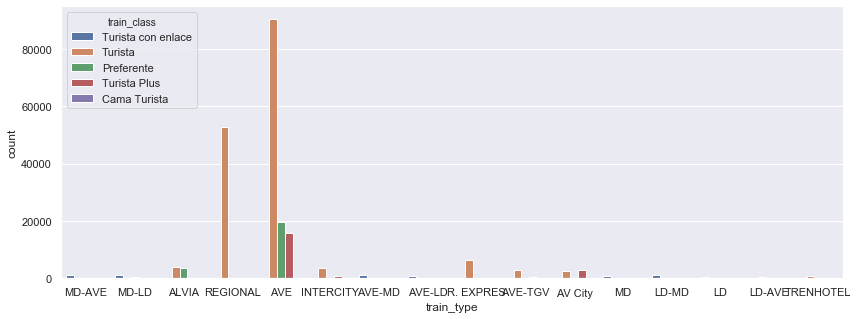

In [26]:
plt.figure(figsize=(14,5))
sns.countplot(x="train_type", hue="train_class", data=newdf);

**Question: Which the most common train class for traveling among people in general?**

**Answer:** 
* Generaly Turista_class then Preferente_class then turistaplus_class is widely used for traveling. 


#### **Task 16: Plot number of tickets bought from each category**


In [27]:
newdf['price'] = df['price']

In [28]:
newdf['fare']

0         Flexible
1          Promo +
2          Promo +
3          Promo +
4            Promo
            ...   
215904       Promo
215905       Promo
215906       Promo
215907       Promo
215908       Promo
Name: fare, Length: 215909, dtype: object

In [29]:
#write code here
# df.head()
df_tickt_origin = newdf.groupby('price',)['fare'].value_counts()
df_tickt_origin

price   fare    
16.60   Promo        158
17.15   Promo        194
20.60   Promo        201
21.05   Promo         22
21.95   Promo       1383
                    ... 
127.10  Flexible     420
128.50  Flexible     813
129.30  Flexible       3
172.40  Mesa          22
206.80  Mesa          44
Name: fare, Length: 148, dtype: int64

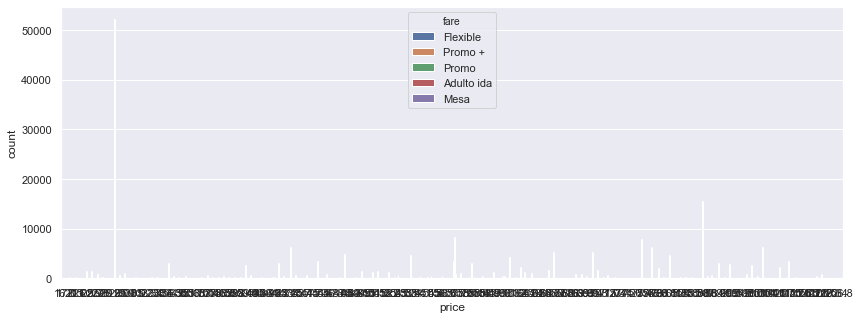

In [30]:
plt.figure(figsize=(14,5));
sns.countplot(x='price', hue='fare', data=newdf);

**Question: Which the most common tickets are bought?**

**Answer:** 
price 21.95 train  AVE sale 1383 fare  promo was the  most saleable ticket.

#### **Task 17: Plot distribution of the ticket prices**

In [31]:
#write code here
df_distrbtn_tickt = newdf.groupby('price',)['train_type'].value_counts()
df_distrbtn_tickt

price   train_type
16.60   INTERCITY      158
17.15   INTERCITY      194
20.60   INTERCITY      201
21.05   INTERCITY       22
21.95   AVE           1383
                      ... 
127.10  AVE            420
128.50  AVE            813
129.30  AVE              3
172.40  AVE             22
206.80  AVE             44
Name: train_type, Length: 178, dtype: int64

In [32]:
df['price']

0         59.50
1         34.65
2         39.95
3         40.60
4         27.90
          ...  
215904    47.30
215905    47.30
215906    47.30
215907    47.30
215908    52.20
Name: price, Length: 215909, dtype: float64

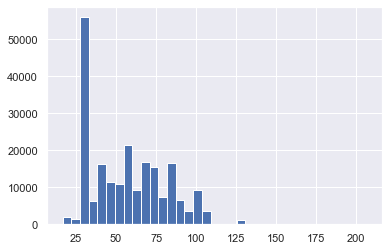

In [33]:
# plt.figure(figsize=(14,5));
# sns.countplot(x='price', hue='fare', data=newdf);

plt.hist(df['price'], bins=35)
plt.show()

**Question: What readings can you get from the above plot?**

**Answer:**          
* ticket price more distribute from 26 to 32 then more distributed 52 to 58 an then 68 to 75 and then 80 to 85 and then 95 to 100 remainig all of them are included in avrage distributed 

###### **Task 18: Show train_class vs price through boxplot**

In [34]:
df_train_calss_vs_ticket = newdf.groupby('train_class',)['price'].value_counts()
df_train_calss_vs_ticket

train_class         price
Cama Turista        74.20      25
Preferente          69.40    5291
                    56.70    4695
                    98.00    2714
                    61.45    2237
                             ... 
Turista con enlace  31.20     135
                    35.75     135
                    35.15      53
                    44.70      37
                    43.70      13
Name: price, Length: 150, dtype: int64

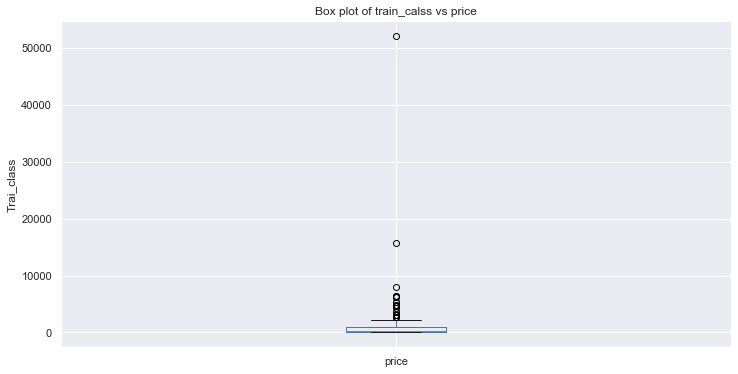

In [35]:
#write code here
df_train_calss_vs_ticket.plot(kind='box', figsize=(12, 6))

plt.title('Box plot of train_calss vs price')
plt.ylabel('Trai_class')

plt.show()

**Question: What pricing trends can you find out by looking at the plot above?**

**Answer:**

#### **Task 19: Show train_type vs price through boxplot**


In [36]:
#write code here
df_train_type_vs_ticket = newdf.groupby('train_type',)['price'].value_counts()
df_train_type_vs_ticket

train_type  price
ALVIA       56.70     5090
            87.40      606
            52.45      316
            33.50      286
            61.20      281
                     ...  
R. EXPRES   56.70      120
REGIONAL    28.35    52155
            56.70      702
TRENHOTEL   45.80      866
            74.20       25
Name: price, Length: 178, dtype: int64

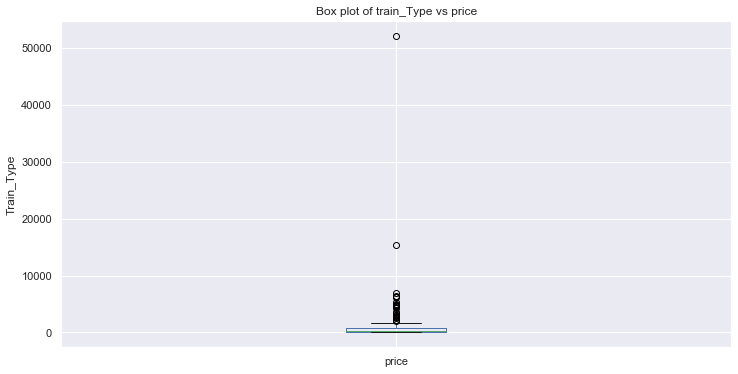

In [37]:
#write code here
df_train_type_vs_ticket.plot(kind='box', figsize=(12, 6))

plt.title('Box plot of train_Type vs price')
plt.ylabel('Train_Type')

plt.show()

**Question: Which type of trains cost more as compared to others?**

**Answer:** 



## Feature Engineering


In [38]:
df = df.reset_index()

**Finding the travel time between the place of origin and destination**<br>
We need to find out the travel time for each entry which can be obtained from the 'start_date' and 'end_date' column. Also if you see, these columns are in object type therefore datetimeFormat should be defined to perform the necessary operation of getting the required time.

**Import datetime library**

In [39]:
#write code here
import datetime

In [40]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = datetime.datetime.strptime(b, datetimeFormat)- datetime.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)                  
    

In [41]:
df['travel_time_in_hrs'] = df.apply(lambda x:fun(x['start_date'],x['end_date']),axis=1) 

In [42]:
df.head()

index      origin destination           start_date             end_date  \
0      0  PONFERRADA      MADRID  2019-06-02 15:00:00  2019-06-02 19:42:00   
1      1  PONFERRADA      MADRID  2019-06-02 17:15:00  2019-06-02 23:03:00   
2      2  PONFERRADA      MADRID  2019-06-02 17:15:00  2019-06-02 23:10:00   
3      3  PONFERRADA      MADRID  2019-06-02 17:15:00  2019-06-02 22:14:00   
4      4  PONFERRADA      MADRID  2019-06-02 18:55:00  2019-06-02 23:03:00   

  train_type  price  travel_time_in_hrs  
0     MD-AVE  59.50            4.700000  
1     MD-AVE  34.65            5.800000  
2      MD-LD  39.95            5.916667  
3     MD-AVE  40.60            4.983333  
4      ALVIA  27.90            4.133333

#### **Task 20: Remove redundant features**


**You need to remove features that are giving the related values as  'travel_time_in_hrs'**<br>
*Hint: Look for date related columns*

In [43]:
#write code here
df.drop(['start_date','end_date'], axis =1 ,inplace=True)

We now need to find out the pricing from 'MADRID' to other destinations. We also need to find out time which each train requires for travelling. 

## **Travelling from MADRID to SEVILLA**

#### Task 21: Findout people travelling from MADRID to SEVILLA

In [44]:
#write code here
df1 = df[df['origin'] =='MADRID']
df1 = df1[df1['destination']=='SEVILLA']
df1.head()

index  origin destination train_type  price  travel_time_in_hrs
364    364  MADRID     SEVILLA    AV City  49.15            2.916667
365    365  MADRID     SEVILLA      ALVIA  56.70            2.733333
366    366  MADRID     SEVILLA        AVE  69.40            2.633333
367    367  MADRID     SEVILLA        AVE  76.30            2.533333
368    368  MADRID     SEVILLA      ALVIA  56.70            2.600000

#### Task 22: Make a plot for finding out travelling hours for each train type

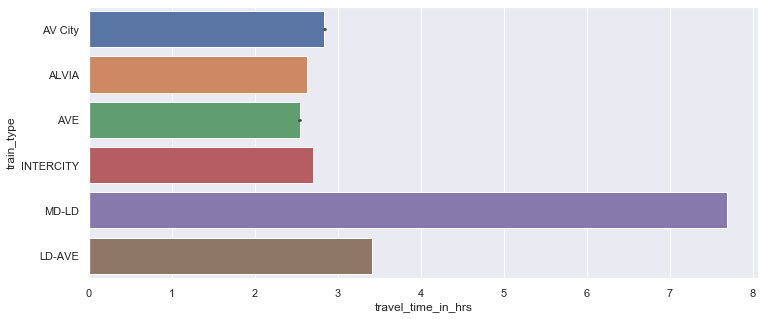

In [45]:
#write code here
plt.figure(figsize=(12,5))
sns.barplot(x='travel_time_in_hrs', y='train_type',  data=df1);

#### **Task 23: Show train_type vs price through boxplot**


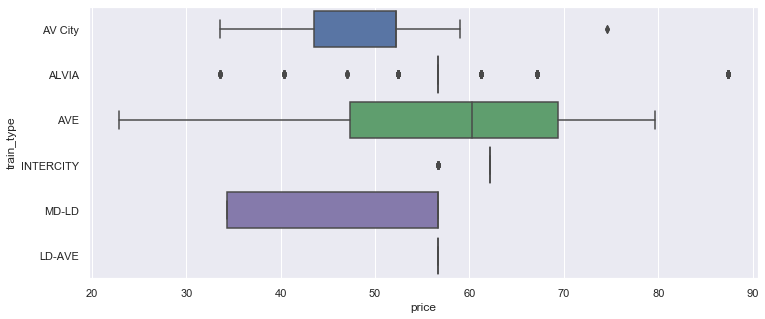

In [46]:
#write code here
plt.figure(figsize=(12,5))
sns.boxplot(x='price', y='train_type',  data=df1);

## **Travelling from MADRID to BARCELONA**


#### Task 24: Findout people travelling from MADRID to BARCELONA

In [47]:
#write code here
df1 = df[(df['origin'] =='MADRID') & (df['destination'] =='BARCELONA')]
df1.head()

index  origin destination train_type  price  travel_time_in_hrs
79     79  MADRID   BARCELONA  R. EXPRES  43.25            9.366667
80     80  MADRID   BARCELONA  R. EXPRES  43.25            9.366667
81     81  MADRID   BARCELONA  R. EXPRES  43.25            9.366667
82     82  MADRID   BARCELONA  R. EXPRES  43.25            9.366667
83     83  MADRID   BARCELONA        AVE  66.75            3.150000

#### Task 25: Make a plot for finding out travelling hours for each train type

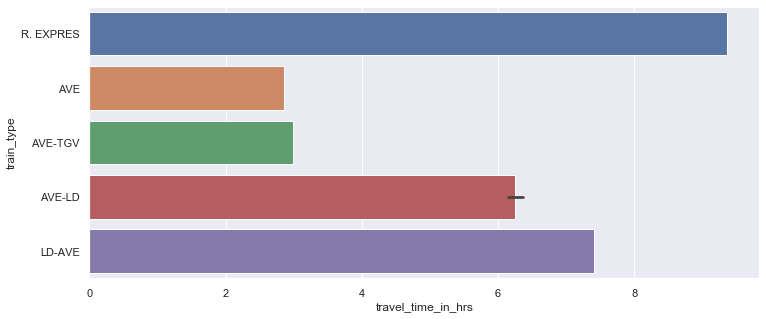

In [48]:
#write code here
plt.figure(figsize=(12,5))
sns.barplot(x='travel_time_in_hrs', y='train_type',  data=df1);

#### **Task 26: Show train_type vs price through boxplot**

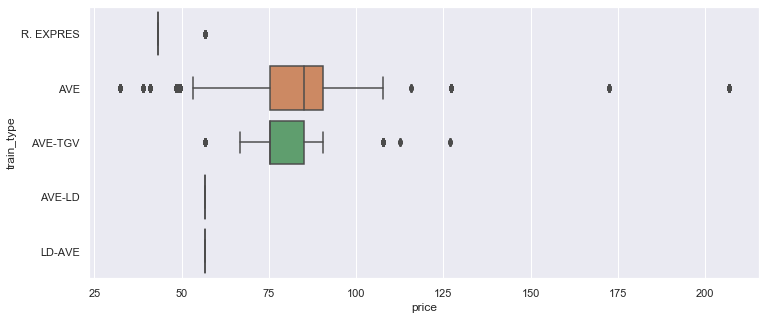

In [49]:
#write code here
plt.figure(figsize=(12,5))
sns.boxplot(x='price', y='train_type',  data=df1);

## **Travelling from MADRID to VALENCIA**

#### Task 27: Findout people travelling from MADRID to VALENCIA

In [50]:
#write code here
df1 = df[(df['origin'] =='MADRID') & (df['destination'] =='VALENCIA')]
df1.head()

index  origin destination train_type  price  travel_time_in_hrs
5      5  MADRID    VALENCIA   REGIONAL  28.35            6.783333
6      6  MADRID    VALENCIA   REGIONAL  28.35            6.716667
7      7  MADRID    VALENCIA   REGIONAL  28.35            6.700000
8      8  MADRID    VALENCIA   REGIONAL  28.35            6.583333
9      9  MADRID    VALENCIA   REGIONAL  28.35            6.366667

#### Task 28: Make a plot for finding out travelling hours for each train type

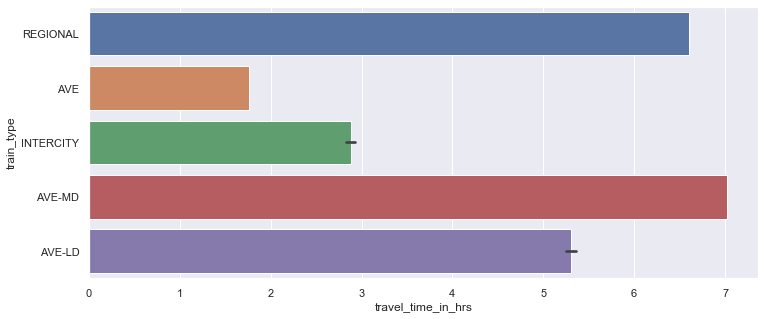

In [51]:
#write code here
plt.figure(figsize=(12,5))
sns.barplot(x='travel_time_in_hrs', y='train_type',  data=df1);

#### **Task 29: Show train_type vs price through boxplot**

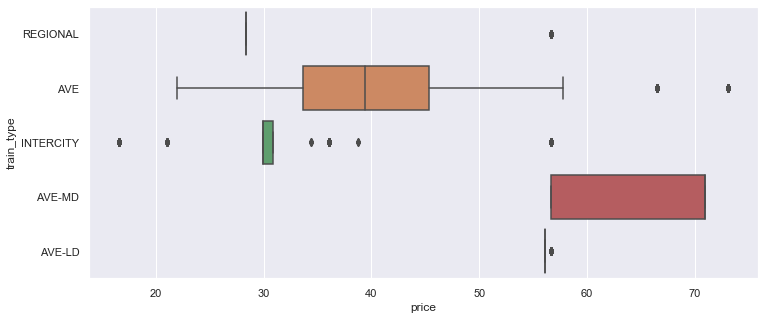

In [52]:
#write code here
plt.figure(figsize=(12,5))
sns.boxplot(x='price', y='train_type',  data=df1);

## **Travelling from MADRID to PONFERRADA**

#### Task 30: Findout people travelling from MADRID to PONFERRADA

In [53]:
#write code here
df1 = df[(df['origin'] =='MADRID') & (df['destination'] =='PONFERRADA')]
df1.head()

index  origin destination train_type  price  travel_time_in_hrs
233    233  MADRID  PONFERRADA     AVE-MD  35.75            3.883333
234    234  MADRID  PONFERRADA     AVE-LD  31.20            4.200000
235    235  MADRID  PONFERRADA      ALVIA  33.50            4.050000
236    236  MADRID  PONFERRADA      LD-MD  56.70            6.533333
237    237  MADRID  PONFERRADA         LD  42.75            4.200000

#### Task 31: Make a plot for finding out travelling hours for each train type

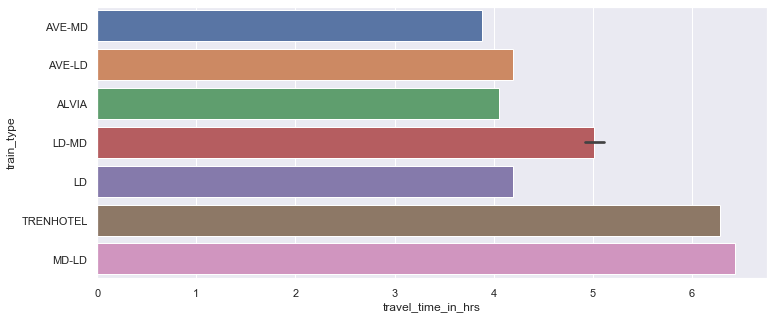

In [54]:
#write code here
plt.figure(figsize=(12,5))
sns.barplot(x='travel_time_in_hrs', y='train_type',  data=df1);

#### **Task 32: Show train_type vs price through boxplot**

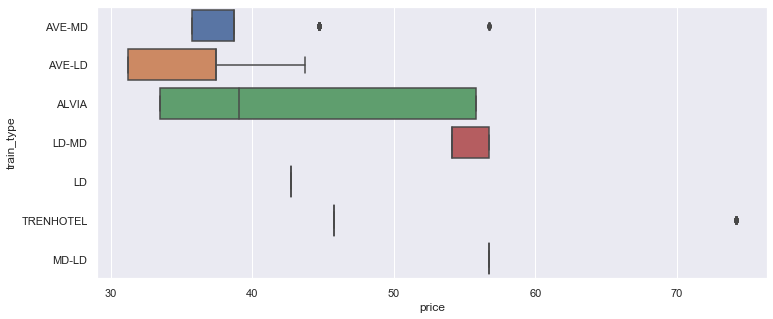

In [55]:
#write code here
plt.figure(figsize=(12,5))
sns.boxplot(x='price', y='train_type',  data=df1);

# Applying Linear  Regression

#### Task 33: Import LabelEncoder library from sklearn 

In [56]:
#write code here
import sklearn 

In [57]:
from sklearn import preprocessing
lab_en = preprocessing.LabelEncoder()

**Data Encoding**

In [58]:
lab_en 
df.iloc[:,1] = lab_en.fit_transform(df.iloc[:,1])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,3] = lab_en.fit_transform(df.iloc[:,3])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])
# df.iloc[:,6] = lab_en.fit_transform(df.iloc[:,6])

In [59]:
df.head()

index  origin  destination  train_type  price  travel_time_in_hrs
0      0       2            1          11  59.50                  47
1      1       2            1          11  34.65                  53
2      2       2            1          12  39.95                  54
3      3       2            1          11  40.60                  48
4      4       2            1           0  27.90                  44

#### Task 34: Separate the dependant and independant variables

In [60]:
#write code here
X = df.drop(['price'], axis=1)
Y = df[['price']]
print(X.shape)
print(Y.shape)

(215909, 5)
(215909, 1)


#### Task 35: Import test_train_split from sklearn

In [61]:
#write code here
from sklearn.model_selection import train_test_split


#### Task 36:**Split the data into training and test set**

In [62]:
#write code here
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.30, random_state=25,shuffle=True)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(151136, 5) (151136, 1)
(64773, 5) (64773, 1)


#### Task 37: Import LinearRegression library from sklearn

In [63]:
#write code here
from sklearn.linear_model import LinearRegression

#### Task 38: Make an object of LinearRegression( ) and train it using the training data set

In [64]:
#write code here
lr =  LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Task 39: Find out the predictions using test data set.

In [65]:
#write code here
lr_predict = lr.predict(X_test)

#### Task 40: Find out the predictions using training data set.

In [66]:
#write code here
lr_predict_train = lr.predict(X_train)
print(lr_predict_train)

[[76.23885926]
 [50.2533793 ]
 [55.58965094]
 ...
 [28.11512784]
 [28.24156029]
 [81.10172596]]


#### Task 41: Import r2_score library form sklearn

In [67]:
#write code here
from sklearn.metrics import r2_score

#### Task 42: Find out the R2 Score for test data and print it.

In [68]:
#write code here
lr_r2_test=r2_score(Y_test,lr_predict)
print(lr_r2_test)

0.6873498703996623


#### Task 43: Find out the R2 Score for training data and print it.

In [69]:
lr_train_predict = lr.predict(X_train)

In [70]:
lr_r2_train =r2_score(Y_train,lr_train_predict)

Comaparing training and testing R2 scores

In [71]:
print('R2 score for Linear Regression Testing Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test)

R2 score for Linear Regression Testing Data is:  0.6873016666957598
R2 score for Linear Regression Testing Data is:  0.6873498703996623


# Applying Polynomial Regression

#### Task 44: Import PolynomialFeatures from sklearn

In [72]:
#write code here
from sklearn.preprocessing import PolynomialFeatures

#### Task 45: Make and object of default Polynomial Features

In [73]:
#write code here
poly_reg = PolynomialFeatures(degree=2)

#### Task 46: Transform the features to higher degree features.

In [74]:
#write code here
X_train_poly = poly_reg.fit_transform(X_train)

#### Task 47: Fit the transformed features to Linear Regression

In [75]:
#write code here
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Task 48: Find the predictions on the data set

In [76]:
X_test_poly=poly_reg.fit_transform(X_test)
y_test_predict = poly_model.predict(X_test_poly)

In [77]:
#write code here
y_train_predicted =poly_model.predict(X_train_poly)
y_train_predicted

array([[75.15656036],
       [41.18037095],
       [57.14691603],
       ...,
       [29.7184626 ],
       [26.22667494],
       [83.10902075]])

#### Task 49: Evaluate R2 score for training data set

In [78]:
#evaluating the model on training dataset
#write code here
r2_train = r2_score(Y_train, y_train_predicted)

#### Task 50: Evaluate R2 score for test data set

In [79]:
# evaluating the model on test dataset
#write code here
r2_test = r2_test = r2_score(Y_test, y_test_predict)

Comaparing training and testing R2 scores

In [80]:
#write code here
print ('The r2 score for training set is: ',r2_train)
print ('The r2 score for testing set is: ',r2_test)

The r2 score for training set is:  0.7213315458031593
The r2 score for testing set is:  0.7214788905987821


#### Task 51: Select the best model

**Question: Which model gives the best result for price prediction? Find out the complexity using R2 score and give your 

**answer.**
* Polynomial gives the best result as compared to linear regression
* in linear regression test data the result was 68 but in polynomial regression the accuracy increases reahed to 72% so the over all result of the polynomial regression is soo good *<br>
*Hint: Use for loop for finding the best degree and model complexity for polynomial regression model*

In [81]:
#write code here
r2_train=[]
r2_test=[]
for i in range(1,6):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly,X_tst_poly = poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)
    poly = LinearRegression()
    poly.fit(X_tr_poly, Y_train)
   
    y_tr_predicted,y_tst_predict = poly.predict(X_tr_poly),poly.predict(X_tst_poly)
    r2_train.append(r2_score(Y_train, y_tr_predicted))
    r2_test.append(r2_score(Y_test, y_tst_predict))
    
print ('R2 Train', r2_train)
print ('R2 Test', r2_test)

R2 Train [0.6873016666957599, 0.7213315458031593, 0.7154821913154501, 0.6860860441072743, 0.5843310066769589]
R2 Test [0.6873498703996623, 0.7214788905987821, 0.715424531315926, 0.6871095146926914, 0.5866749424420445]


#### Plotting the model

In [82]:
!pip install seaborn==0.9.0

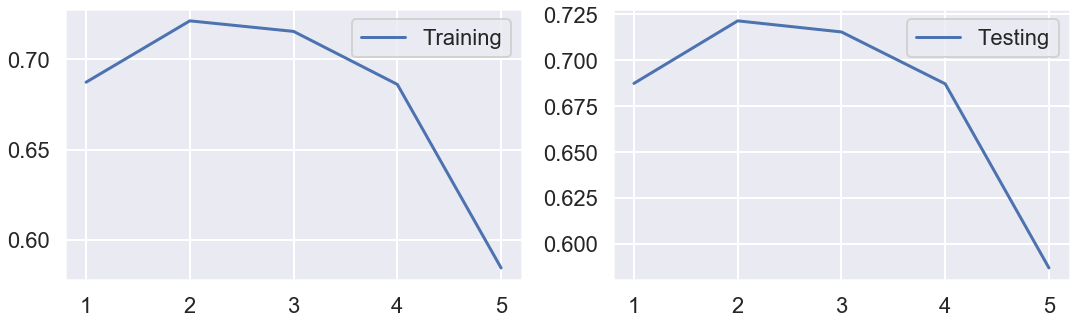

In [83]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,6)), y=r2_train, label='Training');
plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,6)), y=r2_test, label='Testing');

**Answer**